**Barcode Detection Using Deep Learning Model (TinyYolo3) and Pyzbar**

Flushing and mounting drive

In [1]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Traversing to the code repo:**

In [3]:
cd /content/drive/MyDrive/DeepLearningProjectNYU/Barcode-detection-main

/content/drive/MyDrive/DeepLearningProjectNYU/Barcode-detection-main


**Installing libraries and modules from requirements file**

In [4]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [5]:
%pwd


'/content/drive/MyDrive/DeepLearningProjectNYU/Barcode-detection-main'

**Installing zbar library**

In [6]:
!sudo apt-get install libzbar0
!pip install pyzbar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common libdjvulibre-text libdjvulibre21 libfftw3-double3
  libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libjxr-tools libjxr0
  liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x libfftw3-bin libfftw3-dev inkscape poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common libdjvulibre-text libdjvulibre21 libfftw3-

**Exploring the dataset:**

Counting the number of records in training, validation and combined dataset.

In [47]:
import tensorflow as tf

# Function to count the number of records in a TFRecord file
def count_records(tfrecord_file):
    count = 0
    for _ in tf.data.TFRecordDataset(tfrecord_file):
        count += 1
    return count

# Encoding the TFRecord file path
all_tfrecord_file_path = '/content/drive/MyDrive/DeepLearningProjectNYU/Barcode-detection-main/data/all.tf_record'
tfrecord_file_path = '/content/drive/MyDrive/DeepLearningProjectNYU/Barcode-detection-main/data/train.tf_record'
validation_tfrecord_file_path = '/content/drive/MyDrive/DeepLearningProjectNYU/Barcode-detection-main/data/validation.tf_record'

# getting the count
all_of_records = count_records(all_tfrecord_file_path)
number_of_records = count_records(tfrecord_file_path)
number_of_validation_records = count_records(validation_tfrecord_file_path)

print(f'The total number of TFRecord file contains {all_of_records} records.')
print(f'The training TFRecord file contains {number_of_records} validation records.')
print(f'The validation TFRecord file contains {number_of_validation_records} total records.')


The total number of TFRecord file contains 595 records.
The training TFRecord file contains 535 validation records.
The validation TFRecord file contains 60 total records.


**Visualizing the tensor images**

The dataset contains input images in the form of tensors. Annotations in the form of csv file which contains the bounding box co-ordinates of the barcode and the class label.

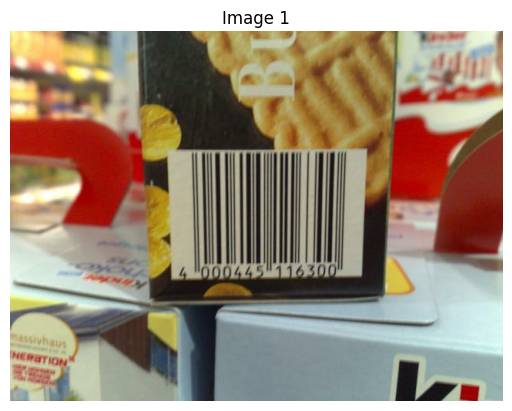

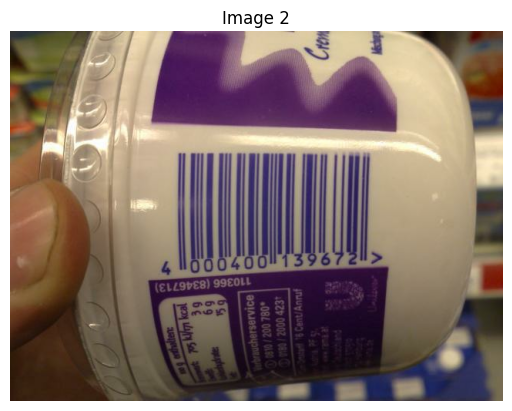

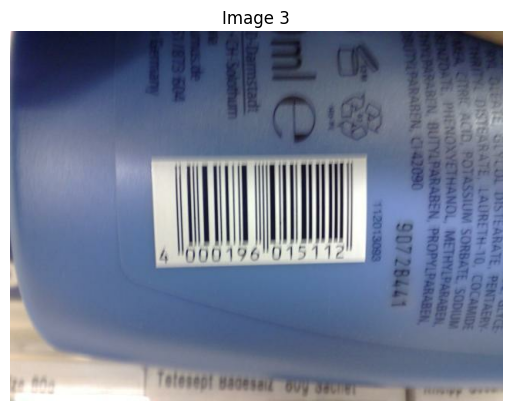

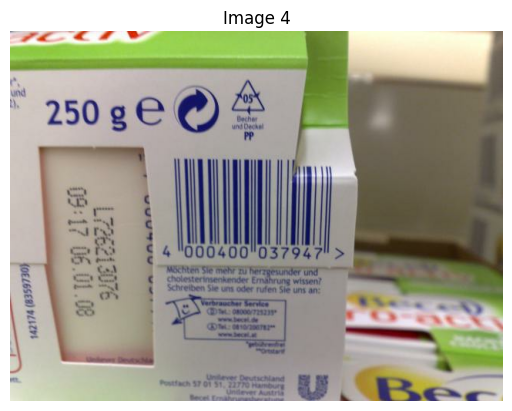

In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt

def _parse_tfrecord_function(example_proto):
    # Define the feature description dictionary to parse the TFRecord file
    feature_description = {
        'image/encoded': tf.io.FixedLenFeature([], tf.string),
        # Add other features here if needed
    }
    return tf.io.parse_single_example(example_proto, feature_description)

# Function to visualize the images
def visualize_tfrecord(tfrecord_file, num_images=5):
    # Open the TFRecord file
    raw_dataset = tf.data.TFRecordDataset(tfrecord_file)

    for i, raw_record in enumerate(raw_dataset.take(num_images)):
        example = _parse_tfrecord_function(raw_record)

        # Decode the image
        image = tf.image.decode_jpeg(example['image/encoded'], channels=3)
        image = tf.image.convert_image_dtype(image, tf.uint8)

        # Display the image
        plt.figure()
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Image {i+1}")
        plt.show()

# Replace 'train.tf_record' with your file path
visualize_tfrecord('/content/drive/MyDrive/DeepLearningProjectNYU/Barcode-detection-main/data/all.tf_record', num_images=4)  # Display the first 4 images


**Understanding Annotations:**

Annotations file contains the info about images, the four bounding box co-ordinates, class labels

In [51]:
import pandas as pd

# Path to your CSV file
csv_file_path = 'data/annotations.csv'

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Print the first 4 records in a formatted way
print(df.head(4).to_string(index=False))



4000445116300-01_N95-2592x1944_scaledTo640x480bilinear  0.3671875  0.322916666666667  0.684375  0.629166666666667  0
4000400139672-01_N95-2592x1944_scaledTo640x480bilinear   0.337500           0.325000  0.732812           0.614583  0
4000196015112-01_N95-2592x1944_scaledTo640x480bilinear   0.328125           0.352083  0.696875           0.579167  0
4000400037947-01_N95-2592x1944_scaledTo640x480bilinear   0.329688           0.341667  0.656250           0.579167  0
4000492002496-01_N95-2592x1944_scaledTo640x480bilinear   0.364063           0.310417  0.679688           0.616667  0


**Creating a grayscale version of the training dataset:**

Note the below code was executed for all, training and validation data to create their corresponding grayscale dataset and saved in the repo. But here code is shown only for validation.

In [33]:
import tensorflow as tf
import os

def _parse_tfrecord_function(example_proto):
    # Define the feature description dictionary to parse the TFRecord file
    feature_description = {
        'image/encoded': tf.io.FixedLenFeature([], tf.string),
        # Add other features here if needed
    }
    return tf.io.parse_single_example(example_proto, feature_description)

def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def convert_to_grayscale_and_save(tfrecord_input_file, tfrecord_output_file):
    # Create a writer for the output TFRecord file
    writer = tf.io.TFRecordWriter(tfrecord_output_file)

    raw_dataset = tf.data.TFRecordDataset(tfrecord_input_file)

    for raw_record in raw_dataset:
        example = _parse_tfrecord_function(raw_record)

        # Decode the image
        image = tf.image.decode_jpeg(example['image/encoded'], channels=3)

        # Convert to grayscale
        grayscale_image = tf.image.rgb_to_grayscale(image)

        # Encode the grayscale image to JPEG
        encoded_grayscale = tf.image.encode_jpeg(grayscale_image)

        # Create a feature
        feature = {
            'image/encoded': _bytes_feature(encoded_grayscale.numpy())
        }

        # Create an example protocol buffer
        example = tf.train.Example(features=tf.train.Features(feature=feature))

        # Serialize to string and write to file
        writer.write(example.SerializeToString())

    writer.close()

# Input TFRecord file path
input_tfrecord_path = '/content/drive/MyDrive/DeepLearningProjectNYU/Barcode-detection-main/data/validation.tf_record'
# Output TFRecord file path (in the same directory)
output_tfrecord_path = '/content/drive/MyDrive/DeepLearningProjectNYU/Barcode-detection-main/data/validation_grayscale.tf_record'

convert_to_grayscale_and_save(input_tfrecord_path, output_tfrecord_path)


**Training our deep learning model:**

Loading pre-trained weights:

This code initializes a TinyYOLO model for object detection with 80 classes, loads pre-trained Darknet weights, and saves these weights for future training and inference.

In [8]:
#Importing TinyYolo class and loading darknet weights
from model.tiny_yolo import TinyYolo
from model.utils import load_darknet_weights
from settings import Settings

In [9]:
# create an instance of TinyYolo class and define the path to inital weights file
tinyolo = TinyYolo(training=True, classes=80)
initial_weights = 'data/model/yolov3-tiny.weights'

# Generate the actual Keras model using the internal method _gen_model() of the TinyYolo instance.
tinyolo.model = tinyolo._gen_model()

# Load the pre-trained Darknet weights into the TinyYolo model.
# This is important for transfer learning,
load_darknet_weights(tinyolo.model, initial_weights)

# Save the weights for future training and inference.
tinyolo.model.save_weights(Settings.train["pretrained_weights"])

Finally, fine-tuning and training on the barcode dataset:

In [11]:
 #Training the model on barcode datasets, the train method returns the history object while fitting data
 #which can be used for analysis.
 history = tinyolo.train('data/train.tf_record','data/validation.tf_record')

Epoch 1/10


     17/Unknown - 46s 2s/step - loss: 1406.3383 - yolo_output_0_loss: 213.4870 - yolo_output_1_loss: 1188.9000
Epoch 1: saving model to checkpoints/yolov3_train_1.tf
17/17 [==============================] - 58s 2s/step - loss: 1406.3383 - yolo_output_0_loss: 213.4870 - yolo_output_1_loss: 1188.9000 - val_loss: 335.0178 - val_yolo_output_0_loss: 37.8544 - val_yolo_output_1_loss: 293.2343 - lr: 0.0010
Epoch 2/10
17/17 [==============================] - ETA: 0s - loss: 338.8159 - yolo_output_0_loss: 22.9083 - yolo_output_1_loss: 311.9934
Epoch 2: saving model to checkpoints/yolov3_train_2.tf
17/17 [==============================] - 26s 1s/step - loss: 338.8159 - yolo_output_0_loss: 22.9083 - yolo_output_1_loss: 311.9934 - val_loss: 210.7033 - val_yolo_output_0_loss: 17.6798 - val_yolo_output_1_loss: 189.1255 - lr: 0.0010
Epoch 3/10
17/17 [==============================] - ETA: 0s - loss: 143.7850 - yolo_output_0_loss: 9.1864 - yolo_output_1_loss: 130.7132
Epoch 3: saving model to checkpoi

In [45]:
tinyolo.model.summary()

Model: "yolov3_tiny"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 yolo_darknet (Functional)   ((None, None, None, 256),    6298480   ['input[0][0]']               
                              (None, None, None, 1024))                                           
                                                                                                  
 yolo_conv_0 (Functional)    (None, 13, 13, 256)          263168    ['yolo_darknet[0][1]']        
                                                                                                  
 yolo_conv_1 (Functional)    (None, 26, 26, 384)          33280     ['yolo_conv_0[0][0]'

**Plotting the training and validation loss curve:**

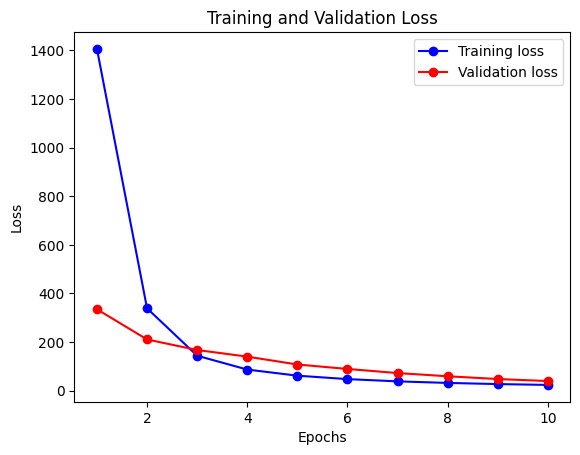

In [12]:
import matplotlib.pyplot as plt

# Extract loss values
training_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss
plt.figure()
plt.plot(epochs, training_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Training the model on grayscale images:**

Now we would like to use the exact same procedure as above but this time to do training on a grayscale dataset. This is useful to understand about the performance of barcode detction in RGB vs grayscale images.

In [10]:
# create an instance of TinyYolo class and define the path to inital weights file
tinyolo_gray = TinyYolo(training=True, classes=80)
initial_weights = 'data/model/yolov3-tiny.weights'

# Generate the actual Keras model using the internal method _gen_model() of the TinyYolo instance.
tinyolo_gray.model = tinyolo_gray._gen_model()

# Load the pre-trained Darknet weights into the TinyYolo model.
# This is important for transfer learning,
load_darknet_weights(tinyolo_gray.model, initial_weights)

# Save the weights for future training and inference.
tinyolo_gray.model.save_weights(Settings.train["pretrained_weights"])

In [13]:
#Training the model, the train method returns the history object while fitting data
#which can be used for analysis.
 history_gray = tinyolo_gray.train('data/train_grayscale.tf_record','data/validation_grayscale.tf_record')

Epoch 1/10
     17/Unknown - 25s 1s/step - loss: 1011.9776 - yolo_output_0_loss: 141.3060 - yolo_output_1_loss: 866.7454
Epoch 1: saving model to checkpoints/yolov3_train_1.tf
17/17 [==============================] - 31s 2s/step - loss: 1011.9776 - yolo_output_0_loss: 141.3060 - yolo_output_1_loss: 866.7454 - val_loss: 293.8719 - val_yolo_output_0_loss: 22.8037 - val_yolo_output_1_loss: 267.1939 - lr: 0.0010
Epoch 2/10
17/17 [==============================] - ETA: 0s - loss: 230.4608 - yolo_output_0_loss: 12.4104 - yolo_output_1_loss: 214.2095
Epoch 2: saving model to checkpoints/yolov3_train_2.tf
17/17 [==============================] - 24s 1s/step - loss: 230.4608 - yolo_output_0_loss: 12.4104 - yolo_output_1_loss: 214.2095 - val_loss: 195.5457 - val_yolo_output_0_loss: 11.6892 - val_yolo_output_1_loss: 180.0487 - lr: 0.0010
Epoch 3/10
17/17 [==============================] - ETA: 0s - loss: 97.1884 - yolo_output_0_loss: 4.4484 - yolo_output_1_loss: 88.9527
Epoch 3: saving model to c

**Plotting the training and validation loss curve for the model trained on grayscale images:**

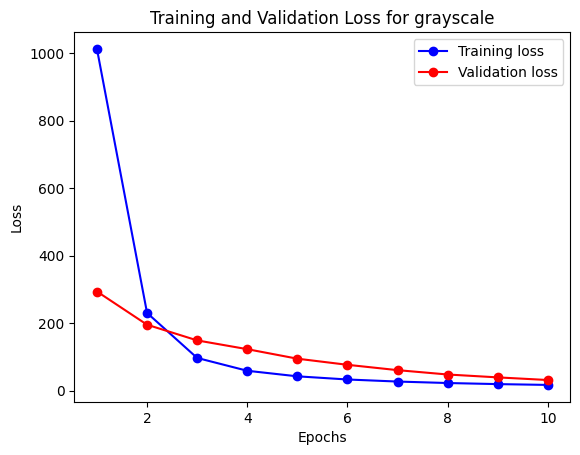

In [16]:
import matplotlib.pyplot as plt

# Extract loss values
training_loss_gray = history_gray.history['loss']
val_loss_gray = history_gray.history['val_loss']
epochs = range(1, len(training_loss_gray) + 1)

# Plot the training and validation loss
plt.figure()
plt.plot(epochs, training_loss_gray, 'bo-', label='Training loss')
plt.plot(epochs, val_loss_gray, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss for grayscale')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Comparing the model trained on RGB images vs model trained on grayscale images by plotting their training and validation loss curves.**

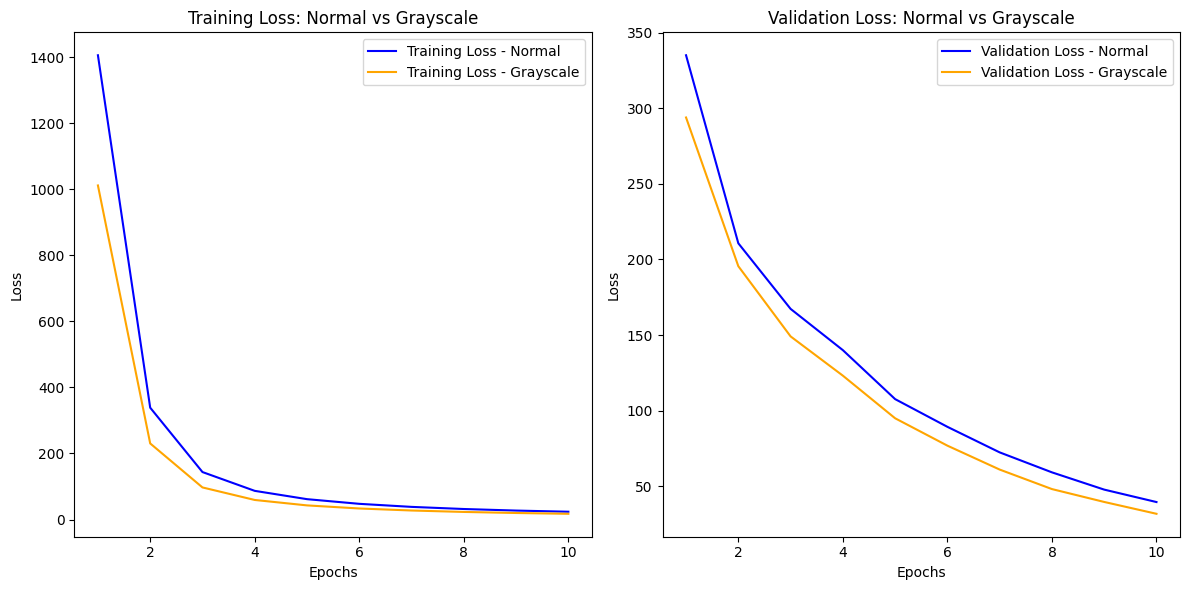

In [19]:
import matplotlib.pyplot as plt

# Number of epochs (assuming both training processes had the same number of epochs)
epochs = range(1, len(training_loss) + 1)

# Plotting training loss for both
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs,training_loss, label='Training Loss - Normal', color='blue')
plt.plot(epochs,training_loss_gray, label='Training Loss - Grayscale', color='orange')
plt.title('Training Loss: Normal vs Grayscale')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting validation loss for both
plt.subplot(1, 2, 2)
plt.plot(epochs,val_loss, label='Validation Loss - Normal', color='blue')
plt.plot(epochs,val_loss_gray, label='Validation Loss - Grayscale', color='orange')
plt.title('Validation Loss: Normal vs Grayscale')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



**Barode Detection using TinyYolo3 & Pyzbar:**

In [20]:
img_path='/content/drive/MyDrive/DeepLearningProjectNYU/Barcode-detection-main/data/saved_images/image_3.jpg'

**Barcode detection using TinyYolo3 on image:**

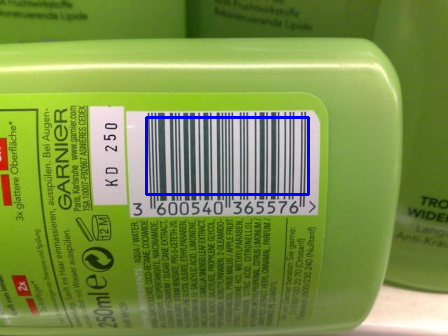

In [55]:
tinyolo.predict(img_path)

The model here doesn't decode the barcode but only detects it by returning the bbox co-ordinates.

**Barcode detection and decoding using Pyzbar:**

Number of barcodes: 1


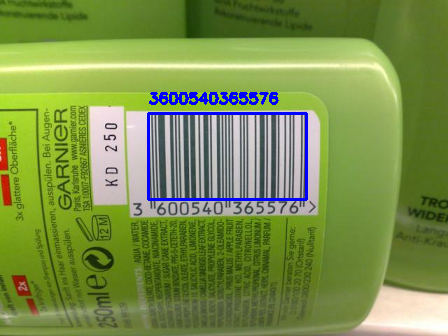

In [32]:
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow
from pyzbar import pyzbar



# load the image
image = cv2.imread('/content/drive/MyDrive/DeepLearningProjectNYU/Barcode-detection-main/data/saved_images/image_3.jpg')

#resize image
image = cv2.resize(image,None,fx=0.7, fy=0.7, interpolation = cv2.INTER_CUBIC)

#convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#calculate x & y gradient
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)


#cv2_imshow(cv2.resize(gradient,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC))

# blur the image
blurred = cv2.blur(gradient, (3, 3))

# threshold the image
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)


#cv2_imshow(cv2.resize(thresh,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC))

# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)


#cv2_imshow(cv2.resize(closed,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC))

# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

barcodes = pyzbar.decode(image)

# Print the number of barcodes detected
print("Number of barcodes:", len(barcodes))

# Loop over the detected barcodes
for barcode in barcodes:
    # Extract barcode data and bounding box coordinates
    barcode_data = barcode.data.decode("utf-8")
    (x, y, w, h) = barcode.rect

    # Draw bounding box around barcode
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Display barcode data as text
    cv2.putText(image, barcode_data, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the image with bounding boxes and barcode data
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Pyzbar detects as well as decodes the barocde. Note the decoded number on top of the detected bounding box.